In [59]:
import uproot
import matplotlib.pyplot as plt
import vector
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx
import math as math
from IPython.core.pylabtools import figsize
import sys, os, glob, pathlib
import numpy as np
import h5py as h5
import glob
import os

import matplotx
from IPython.core.pylabtools import figsize
#sns.set_theme()

plt.style.use(matplotx.styles.github['dark'])
#import ROOT as rt # used for plotting

class JetPlotter:
    exten = '.png'
    def __init__(self, file,):
        self.ofile = uproot.open(file)
        self.lctuple = self.ofile['MyLCTuple']
        self.tree = self.ofile['MyLCTuple;1']
        self.branches = self.tree.arrays()
        self.px_branch = self.branches['jmox']
        self.py_branch = self.branches['jmoy']
        self.pz_branch = self.branches['jmoz']
        self.p = self.branches['jmom']
        self.E_branch  = self.branches['jene']
        self.nevents = len(self.branches['evene'])
        self.njets = self.branches['nj']
        self.jet_4p = vector.zip({'px': self.px_branch, 'py': self.py_branch, 'pz': self.pz_branch, 'E': self.E_branch})
        self.file_title = file
    #Handling Titles
    
       
    #file_list = ['data-june23/884_Jun 30 20023.xls', 'data-june23/870_Jun 30 20023.xls', 'data-june23/000_Jun 30 20023.xls', 'data-june23/865_Jun 30 20023.xls']
    
   # print(file_list)
    def label_format(self):
        tokens = self.file_title.split("_")
        if "bib" in tokens:
            return "BIB 10%"
        else:
            return "BIB 0%"
        
    def file_name(self): 
        check =  self.file_title.split("_")
        if "bib" in check:
                sim_type = "bib/"
        else:
            sim_type = "nbib/"
        tokens = self.file_title.split("/")
        folder_name = tokens[0]
        new_name = "{0}{1}{2}".format(folder_name,'/plots/',sim_type)
        return new_name

    def saver(self, plot_type):
        plt.savefig(self.file_name()+"plot_type"+self.exten)
        plt.show()
       
    def maxj_p(self):
        jet_p_max = np.arange(self.nevents)
        for i in range(0, self.nevents):
            jet_p_max[i]=  max(self.p[i])
        return jet_p_max

    # Determing an array of invariant mass of all jets per event
    def invmass_jets(self): 
        j_invmass = np.empty(len(self.jet_4p), np.float64)
        for i, event in enumerate(self.jet_4p):
            total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
            for jet in event:
                total = total + jet
            j_invmass[i] = total.mass
        return j_invmass
    # Determining an array of invariant mass of two leading jets per event
    def invmass_lead_jets(self):
        j_invmass = np.empty(len(self.jet_4p), np.float64)
        # momentum filter 
        jet_pmasked = ak.sort(self.jet_4p.p, ascending=False)[:,0:2]
        for i, event in enumerate(self.jet_4p):
            total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
            for jet in event:
                p = math.trunc(jet.p)
                if p == math.trunc(int(jet_pmasked[i,0])) or p == math.trunc(int(jet_pmasked[i,1])):
                    total = total + jet
                else:
                    continue
            j_invmass[i] = total.mass
        return j_invmass
    
    
   # def legend():
       #math.ceil(np.sqrt(len(self.invmass_lead_jets()))) 
    
    
    def invmj_plotter(self, showlegend = True, *plot_type='invmass_all_jets'):
        plt.hist(self.invmass_jets(),  bins =40, range=(0, 1000), alpha =0.6, label = self.label_format()+ '\n$\overline{{m}}$ = {0} \n$\sigma_{{m}}$ = {1}'.format(round(np.mean(self.inmass_jets()),2),round(np.std(self.invmass_jets()),2)))
        plt.legend(loc='upper right')
        plt.xticks(np.arange(0, 1000, 100))
        plt.yticks(np.arange(0, 60, 10))
        plt.xlabel("mass [Gev]")
        plt.ylabel('Number of events')
        plt.title('Invariant $m$ distribution jets, 0 MeV threshold')
        self.saver(plot_type)
    
    
    
    # Plotter of invariant mass of two leading jets per event
    def invm2j_plotter(self, showlegend = True, *plot_type='invmass_2_jets'):
        plt.hist(self.invmass_lead_jets(),  bins =40, range=(0, 1000), alpha =0.6, label = self.label_format()+ '\n$\overline{{m}}$ = {0} \n$\sigma_{{m}}$ = {1}'.format(round(np.mean(self.invmass_lead_jets()),2),round(np.std(self.invmass_lead_jets()),2)))
      #  plt.hist(JetPlotter(file_nbib), bins =40, range=(0,500), alpha =0.6, label = 'Without BIB \n$\overline{m}$ = ' +str(round(JetPlotter(file_nbib).invmass_lead_jets,2))
                                                             #   +  '\n$\sigma_{m}$ = ' +str(round(J,2))
        plt.legend(loc='upper right')
        plt.xticks(np.arange(0, 1000, 100))
        plt.yticks(np.arange(0, 60, 10))
        plt.xlabel("mass [Gev]")
        plt.ylabel('Number of events')
        plt.title('Invariant $m$ distribution for two leading jets, 0 MeV threshold')
        self.saver(plot_type)
        #plt.savefig(self.file_name()+"invmass_2_jets"+self.exten)
 # def overlay():

    # Plotter of max jet per event
    def maxj_p_plotter(self,*plot_type='max_j_p'):
        
        plt.hist(self.maxj_p(), bins =30, range=(0,850), alpha =0.5, label = self.label_format()+'\n$\overline{{m}}$ = {0} \n$\sigma_{{m}}$ = {1}'.format(round(np.mean(self.maxj_p()),2),  round(np.std(self.maxj_p()),2)))                                                                                                                                              
        plt.legend(loc='upper right')


        plt.xticks(np.arange(0, 850, 100))
        plt.yticks(np.arange(0, 31, 5))
        plt.xlabel("$p_{\mathrm{J}}$ [GeV]")
        plt.ylabel('Number of events')
        plt.title('Max Jet momentum per event, 2 MeV threshold')
        #plt.savefig(self.file_name()+"invmass_all_jets"+self.exten)
  
   
    @staticmethod
    def inm2j_ovlayed(data1, data2):
        n_rows = 1
        n_cols = 1
        fig, ax = plt.subplots(n_rows, n_cols)
        label_1 = 'BIB 10% \n$\overline{{m}}$ = {0} \n$\sigma_{{m}}$ = {1}'.format(round(np.mean(data1[0],2),round(np.std(data1[0],2))
        label_2 = 'BIB 0% \n$\overline{{m}}$ = {0} \n$\sigma_{{m}}$ = {1}'.format(round(np.mean(data2[0],2),round(np.std(data2[0],2))
        ax.hist(data1[0], bins=40, alpha=0.6, label=label_1)
        ax.hist(data2[0], bins=40, alpha=0.6, label=label_2)                                                                               
        plt.legend(loc='upper right')
        plt.xticks(np.arange(0, 1000, 100))
        plt.yticks(np.arange(0, 60, 10))
        plt.xlabel("mass [Gev]")
        plt.ylabel('Number of events')
        plt.title('Invariant $m$ distribution for two leading jets, 0 MeV threshold') 
        plt.show()                                                                                
        

In [45]:
bib_file= JetPlotter('june_29/lctuple_Output_REC_bib_kh_sk_0.2g.slcio.root')
nbib_file = JetPlotter('june_29/lctuple_Output_REC_nbib_kh_sk_0.2g.slcio.root')

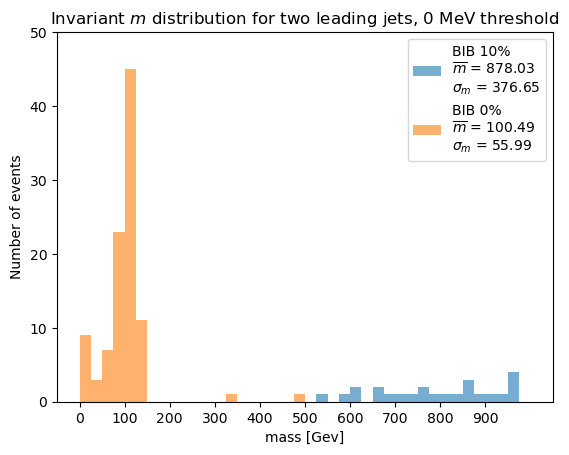

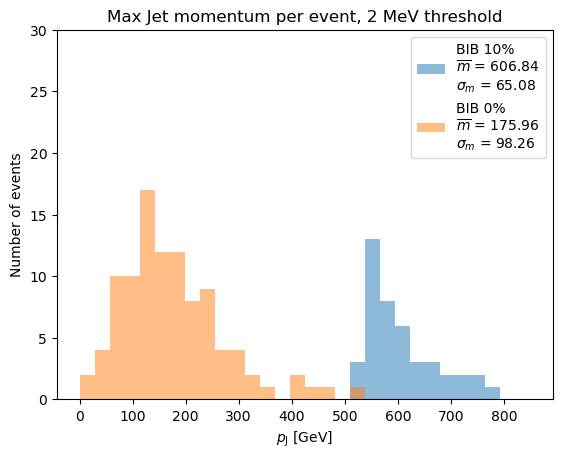

In [47]:
bib_file.invm2j_plotter()
nbib_file.invm2j_plotter()
plt.savefig(bib_file.file_name()+"invmass_all_jets"+bib_file.exten)
plt.show()

bib_file.maxj_p_plotter()
nbib_file.maxj_p_plotter()
plt.savefig(nbib_file.file_name()+"invmass_all_jets"+nbib_file.exten)
plt.show()

In [48]:
import glob

#file_list = glob.glob("data-june23/*_Jun*.xls")
file_list = ['data-june23/870_Jun 30 20023.xls', 'data-june23/000_Jun 30 20023.xls', 'data-june23/865_Jun 30 20023.xls']
file_on= 'data-june23/884_Jun 30 20023.xls'
print(file_list)

for name in file_list :
    tokens = name.split("/")
    print(tokens)
    name_tokens = tokens[-1].split(" ")
    year_typo = name_tokens[-1].replace(".xls","")
    corrected_year = year_typo.replace("200","20")
    month = name_tokens[0].split("_")[-1]
    new_name = "{0}_{1}_{2}".format(corrected_year,month,name_tokens[1])
    print(new_name)
print(file_list)

['data-june23/870_Jun 30 20023.xls', 'data-june23/000_Jun 30 20023.xls', 'data-june23/865_Jun 30 20023.xls']
['data-june23', '870_Jun 30 20023.xls']
2023_Jun_30
['data-june23', '000_Jun 30 20023.xls']
2023_Jun_30
['data-june23', '865_Jun 30 20023.xls']
2023_Jun_30
['data-june23/870_Jun 30 20023.xls', 'data-june23/000_Jun 30 20023.xls', 'data-june23/865_Jun 30 20023.xls']
